# WEATHER PREDICTION USING LINEAR REGRESSION

### Import the necessary libraries

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

### Read the csv file using Pandas

In [7]:
df = pd.read_csv("weather_forecast_data.csv")
df.head()

,Temperature,Humidity,Wind_Speed,Cloud_Cover,Pressure,Rain
0,23.720338,89.592641,7.335604,50.501694,1032.378759,rain
1,27.879734,46.489704,5.952484,4.990053,992.614190,no rain
2,25.069084,83.072843,1.371992,14.855784,1007.231620,no rain
3,23.622080,74.367758,7.050551,67.255282,982.632013,rain
4,20.591370,96.858822,4.643921,47.676444,980.825142,no rain


### checking whether the null values are present and get the sum

In [8]:
df.isnull().sum()

Temperature    0
Humidity       0
Wind_Speed     0
Cloud_Cover    0
Pressure       0
Rain           0
dtype: int64

### Visualize the features using Heatmap

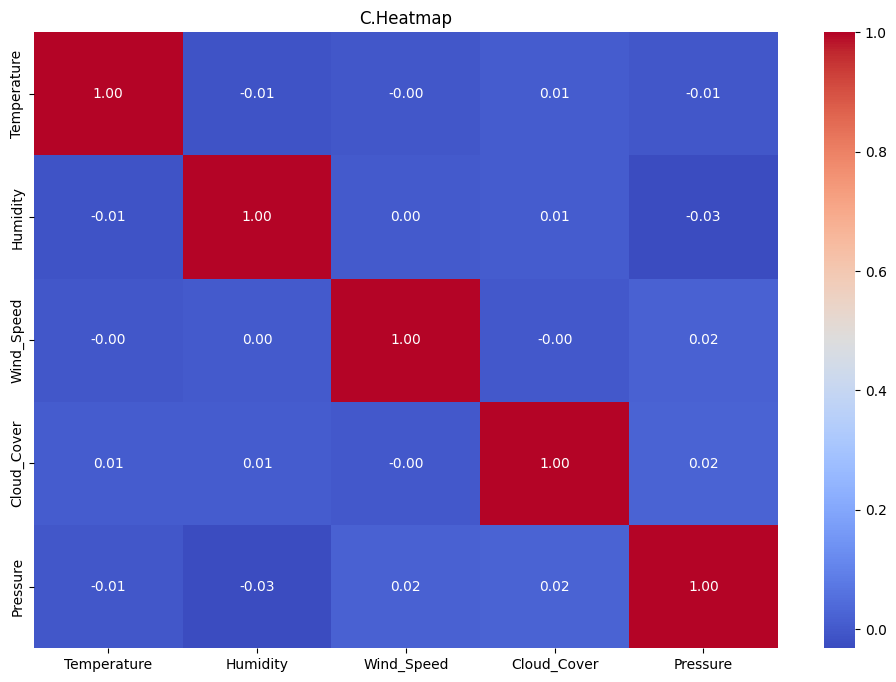

In [9]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(numeric_only=True), annot=True,cmap="coolwarm",fmt=".2f")
plt.title("C.Heatmap")
plt.show()

### Visualize the features using seaborn histplot

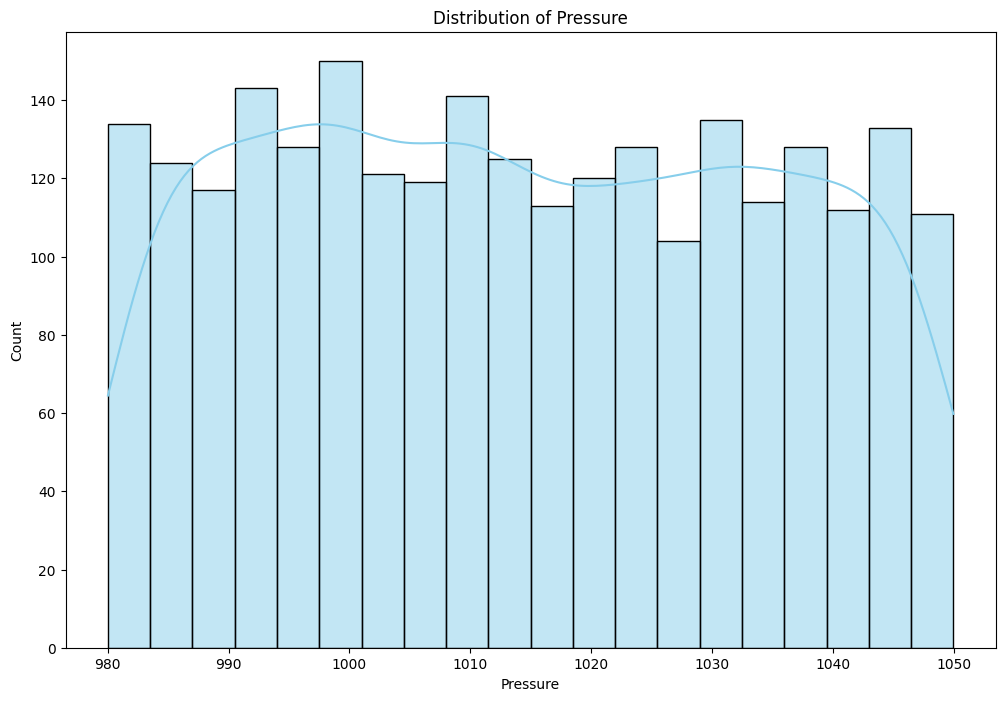

In [10]:
plt.figure(figsize=(12,8))
sns.histplot(df["Pressure"], bins=20, kde=True,color="skyblue")
plt.title("Distribution of Pressure")
plt.show()

### Visualize the features using matplotlib histogram

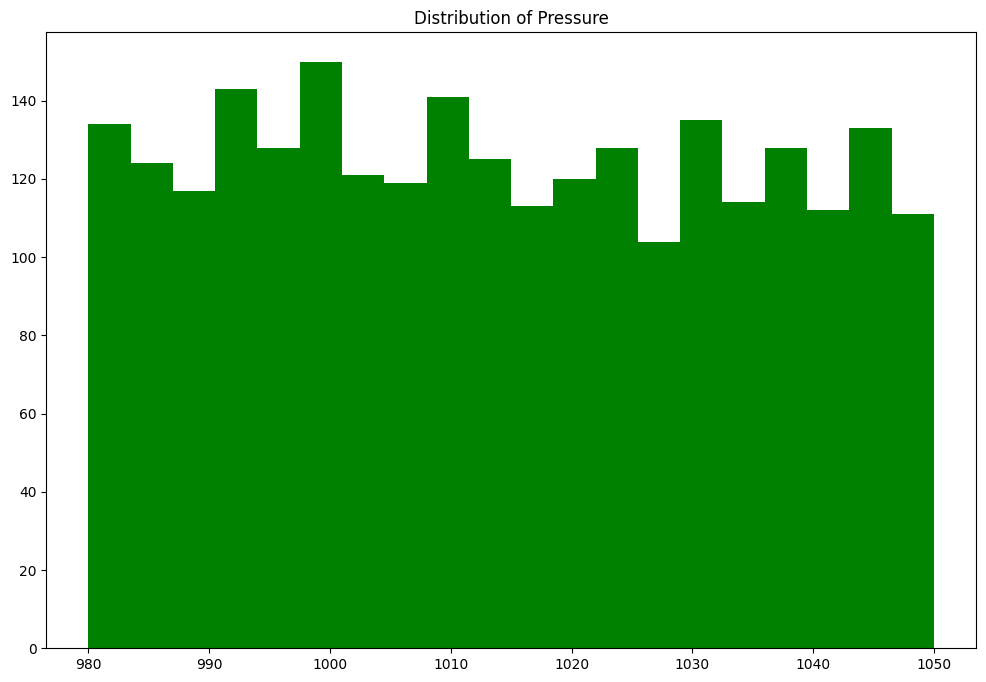

In [11]:
plt.figure(figsize=(12,8))
plt.hist(df["Pressure"], bins=20,color="green")
plt.title("Distribution of Pressure")
plt.show()

### Visualize the features using seaborn pairplot

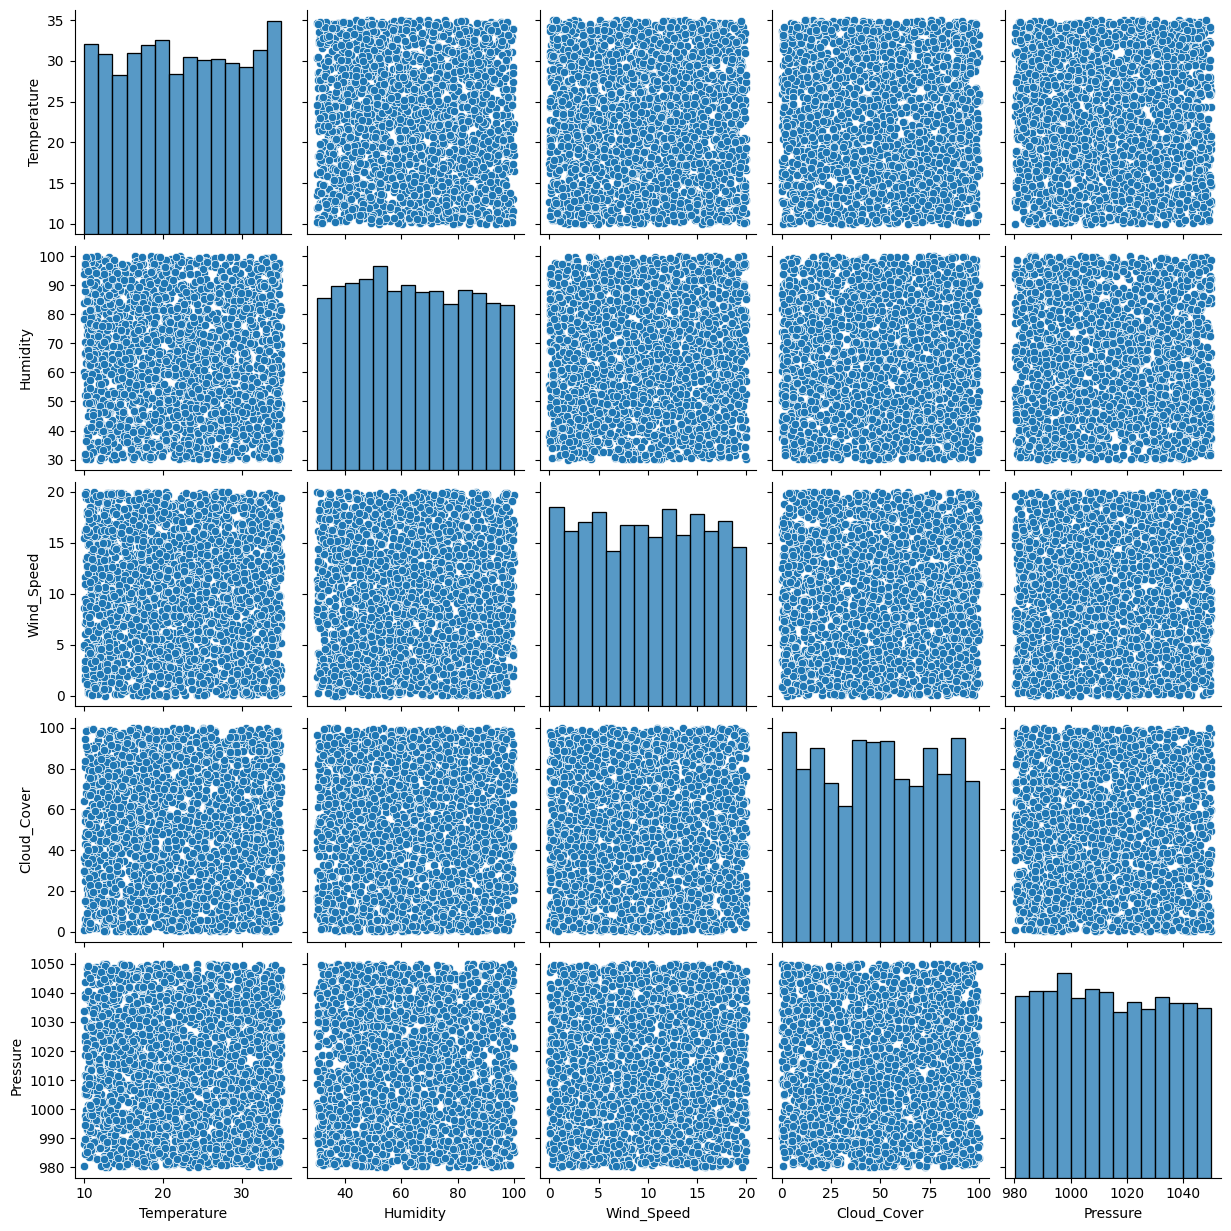

In [12]:
numeric_features = ["Temperature", "Humidity", "Wind_Speed", 'Cloud_Cover', "Pressure"]
sns.pairplot(df[numeric_features])
plt.show()

### Use all other numeric columns as features

In [13]:
target = "Temperature"
X = df.drop(columns=[target])
X = X.select_dtypes(include=["int64", "float64"])

In [14]:
y = df[target]

# Handle missing values
X = X.fillna(X.mean())
y = y.fillna(y.mean())

### seperate the data into train, test and validation

In [16]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

### Training the model

In [17]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

### Predict the test values using the trained model

In [18]:
y_pred = model.predict(X_test)
y_pred

array([22.45093005, 22.7598956 , 22.82407781, 22.80956498, 22.50680076,
       22.46983058, 22.63854153, 22.63375505, 22.44653907, 22.5456475 ,
       22.56746745, 22.37129833, 22.15416422, 22.97689386, 22.57329117,
       22.61077984, 22.877355  , 22.52433907, 22.37349612, 22.44406244,
       22.74928404, 22.48719783, 22.7157279 , 22.76543676, 22.80400901,
       22.76087365, 22.5575151 , 22.89874153, 22.94652233, 22.75710443,
       22.58144208, 22.79450246, 22.43191571, 22.58549914, 22.82909967,
       22.13684614, 22.76151217, 22.20616374, 22.48537126, 22.4596814 ,
       22.71727975, 22.42768991, 22.96117537, 22.42998196, 22.43466216,
       22.87685713, 22.9915835 , 22.52015702, 22.57926254, 22.4772606 ,
       22.19077937, 22.83781047, 22.45798115, 22.66763076, 22.28428522,
       22.58570932, 22.38138602, 22.48618505, 22.65196394, 22.6604489 ,
       22.67066747, 22.28866522, 22.3896911 , 22.91720681, 22.36360688,
       22.431449  , 22.45908202, 22.39277836, 22.55373125, 22.45

### Finding the MAE, MSE, RMSE and R2 values

In [19]:

MAE = mean_absolute_error(y_test, y_pred)
MSE = mean_squared_error(y_test, y_pred)
RMSE = np.sqrt(MSE)
R2 = r2_score(y_test, y_pred)

In [20]:
print("------LOSS FUNCTION VALUES------")
print("Mean Absolute Error:", MAE)
print("Mean Squared Error:", MSE)
print("Root Mean Squared Error:", RMSE)
print("R2 Score:", R2)

------LOSS FUNCTION VALUES------
Mean Absolute Error: 6.240919213506445
Mean Squared Error: 52.15132747594334
Root Mean Squared Error: 7.221587600794118
R2 Score: -0.006504738546836197


In [21]:
train_pred = model.predict(X_train)

print("Train R2:", r2_score(y_train, train_pred))
print("Test R2:", r2_score(y_test, y_pred))

Train R2: 0.0009245826392973999
Test R2: -0.006504738546836197


### Compare actual vs predicted

In [23]:
# Make predictions on test set
y_pred = model.predict(X_test)

comparison_df = pd.DataFrame({
    "Actual": y_test.values,
    "Predicted": y_pred
})

print(comparison_df.head(20))


       Actual  Predicted
0   27.726270  22.450930
1   21.034354  22.759896
2   22.780545  22.824078
3   32.539070  22.809565
4   32.662353  22.506801
5   27.844172  22.469831
6   34.475273  22.638542
7   25.229032  22.633755
8   20.042838  22.446539
9   10.426018  22.545648
10  33.564590  22.567467
11  24.135533  22.371298
12  32.529054  22.154164
13  14.972783  22.976894
14  19.979029  22.573291
15  19.197937  22.610780
16  16.490006  22.877355
17  26.420959  22.524339
18  12.490373  22.373496
19  30.703665  22.444062


### Visualization of the Actual vs Predicted values

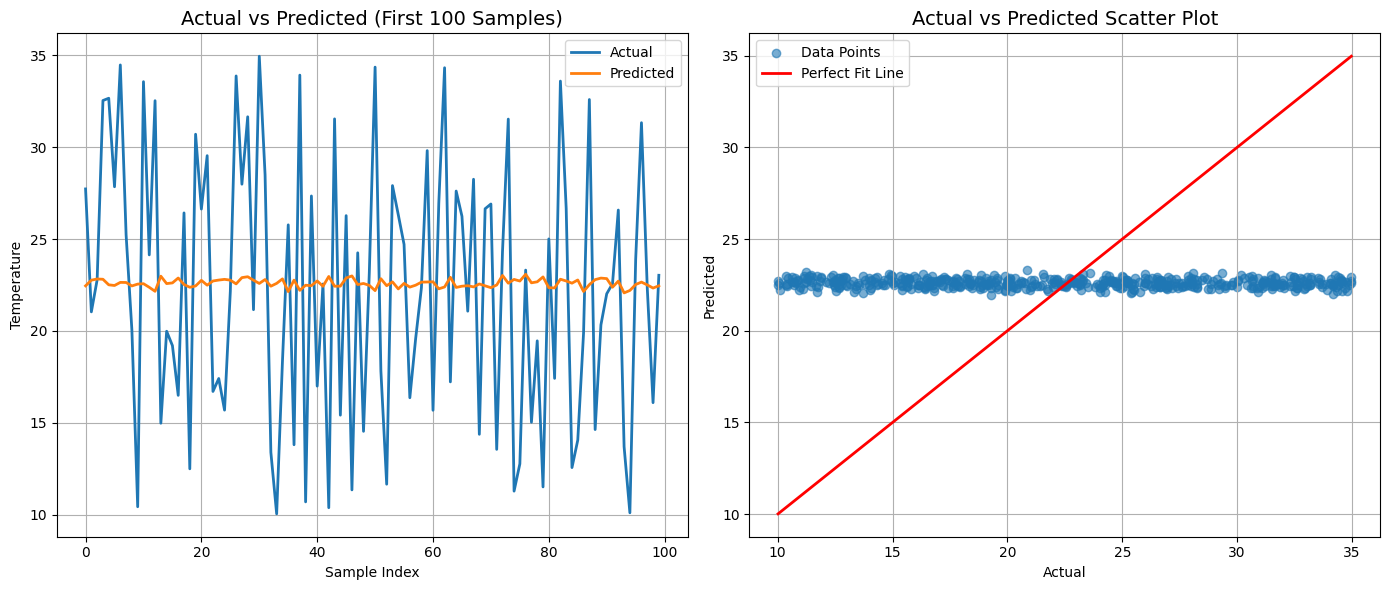

In [24]:
plt.figure(figsize=(14,6))
plt.subplot(1, 2, 1)
plt.plot(y_test.values[:100], label="Actual", linewidth=2)
plt.plot(y_pred[:100], label="Predicted", linewidth=2)
plt.title("Actual vs Predicted (First 100 Samples)", fontsize=14)
plt.xlabel("Sample Index")
plt.ylabel(target)
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred, alpha=0.6, label="Data Points")
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         color='red', linewidth=2, label="Perfect Fit Line")
plt.title("Actual vs Predicted Scatter Plot", fontsize=14)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()
